In [127]:
#importing libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn import metrics
import numpy as np
from scipy import stats
import statsmodels.api as sm

In [128]:
#importing dataset
os.chdir('C:/Users/emrem/OneDrive/Masaüstü/Python/Kaggle_Telco/')
data = pd.read_csv('Telco-Customer-Churn.csv')

In [129]:
##################
#DATA OVERVIEW
##################
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [130]:
##################
#DATA MANIPULATION
##################
data["TotalCharges"] = pd.to_numeric(data.TotalCharges, errors='coerce') 
data["SeniorCitizen"] = data["SeniorCitizen"].replace({1:"Yes",0:"No"})

In [131]:
# counting null values
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
TotalCharges,11,0.156183
Churn,0,0.000000
OnlineSecurity,0,0.000000
gender,0,0.000000
SeniorCitizen,0,0.000000
Partner,0,0.000000
Dependents,0,0.000000
tenure,0,0.000000
PhoneService,0,0.000000
MultipleLines,0,0.000000


In [132]:
#removing null rows
data= data.dropna()

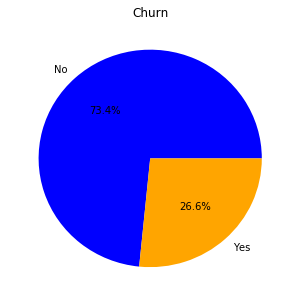

In [133]:
##########################
#EXPLORATORY DATA ANALYSIS
##########################
#TARGET 
labels = data.Churn.value_counts().index
colors = ["blue","orange"]
explode = [0,0]
sizes = data.Churn.value_counts().values
#visualization
plt.figure(figsize=(5,5))
plt.pie(sizes,colors=colors,explode=explode,labels=labels,autopct="%1.1f%%")
plt.title("Churn")
plt.show()

In [134]:
cont_variables=data[['tenure','MonthlyCharges','TotalCharges']]
cont_colname=cont_variables.columns

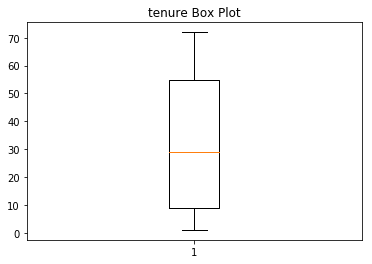

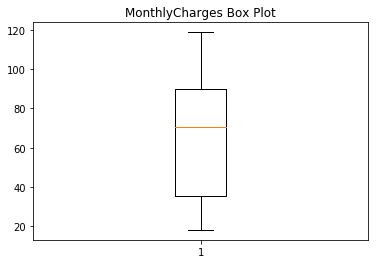

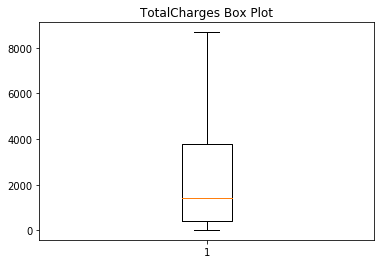

In [135]:
#BOX PLOT
for i in cont_colname:
    fig1, ax1 = plt.subplots()
    ax1.set_title("%s Box Plot" % (i))
    ax1.boxplot(data[i])

In [136]:
#OUTLIER DETECTION
data["z_MonthlyCharges"]=np.abs(stats.zscore(data['MonthlyCharges']))
data["z_MonthlyCharges"]=data[(np.abs(stats.zscore(data['MonthlyCharges'])) < 3)]
data["z_TotalCharges"]=np.abs(stats.zscore(data['TotalCharges']))
data["z_TotalCharges"]=data[(np.abs(stats.zscore(data['TotalCharges'])) < 3)]
data["z_tenure"]=np.abs(stats.zscore(data['tenure']))
data["z_tenure"]=data[(np.abs(stats.zscore(data['tenure'])) < 3)]

#OUTLIERS DELETED
data=data.dropna()

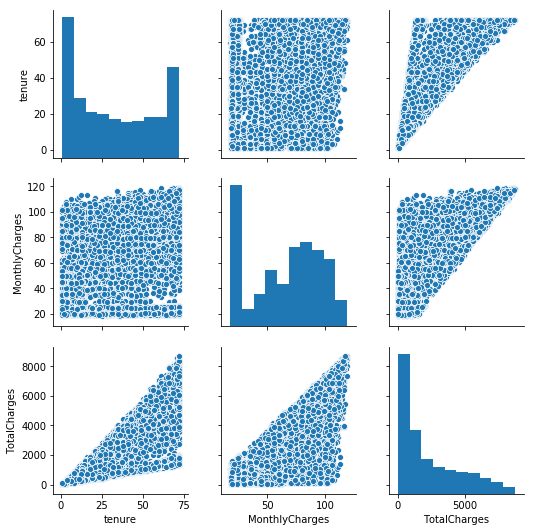

In [137]:
#MULTIPLE SCATTER  
sns.pairplot(data[cont_colname])
plt.show()

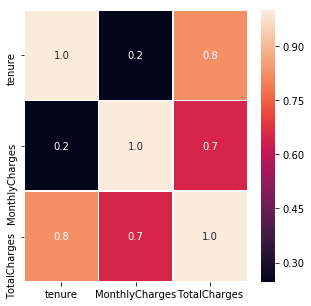

In [138]:
#CORRELATION HEATMAP
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [139]:
#STATISTICAL ANALYSIS FOR FEATURE SELECTION
#PREPARING CATEGORICAL VARIABLES WITH MORE THAN 2 CATEGORIES for chisquare
cat_XX = data[['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']]
#DUMMY CATEGORICAL VARIABLES
for i in cat_XX: 
    cat_XX = pd.concat([cat_XX,pd.get_dummies(cat_XX[str(i)],\
                                            drop_first=True,prefix=str(i))],axis=1)
cat_XX = cat_XX.drop(columns=['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod'])
cat_xx_colname=cat_XX.columns

#CHI-SQUARE INDEPENDENCE TEST
data_chisquare=pd.concat([data[['Churn']],cat_XX],axis=1)
data_chisquare_colname=cat_XX.columns
for a in data_chisquare_colname: 

    contingency_table = pd.crosstab(
        data_chisquare[a],
        data_chisquare['Churn'],
        margins = True
    )
    contingency_table
    
    f_obs = np.append(contingency_table.iloc[0][0:2].values, contingency_table.iloc[1][0:2].values)
    f_obs
    
    row_sums = contingency_table.iloc[0:2,2].values
    row_sums
    
    col_sums = contingency_table.iloc[2,0:2].values
    col_sums
    
    total = contingency_table.loc['All', 'All']
    
    f_expected = []
    for j in range(2):
        for i in col_sums:
            f_expected.append(i*row_sums[j]/total)
    f_expected
    
    dof = (len(row_sums)-1)*(len(col_sums)-1)
    
    f_obs = np.array([contingency_table.iloc[0][0:2].values,
                      contingency_table.iloc[1][0:2].values])
    f_obs
    
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    nl = "\n"
    
    alpha = 0.05
    if p < alpha:
        print('%s target değişkenine göre anlamlı fark gösterir' % (a))
    else:
        print('%s target değişkenine göre anlamlı fark göstermez' % (a))

gender_Male target değişkenine göre anlamlı fark göstermez
SeniorCitizen_Yes target değişkenine göre anlamlı fark gösterir
Partner_Yes target değişkenine göre anlamlı fark gösterir
Dependents_Yes target değişkenine göre anlamlı fark gösterir
PhoneService_Yes target değişkenine göre anlamlı fark göstermez
MultipleLines_No phone service target değişkenine göre anlamlı fark göstermez
MultipleLines_Yes target değişkenine göre anlamlı fark gösterir
InternetService_Fiber optic target değişkenine göre anlamlı fark gösterir
InternetService_No target değişkenine göre anlamlı fark gösterir
OnlineSecurity_No internet service target değişkenine göre anlamlı fark gösterir
OnlineSecurity_Yes target değişkenine göre anlamlı fark gösterir
OnlineBackup_No internet service target değişkenine göre anlamlı fark gösterir
OnlineBackup_Yes target değişkenine göre anlamlı fark gösterir
DeviceProtection_No internet service target değişkenine göre anlamlı fark gösterir
DeviceProtection_Yes target değişkenine gö

In [140]:
# Shapiro-Wilk Test
from numpy.random import seed
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# normality test
for i in cont_colname:
    stat, p = shapiro(data[i])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
    alpha = 0.05
    if p > alpha:
        #print('Sample %s looks Gaussian (fail to reject H0)' %i)
        print('Sample %s looks Gaussian (fail to reject H0)' %i)
    else:
        print('Sample %s does not look Gaussian (reject H0)' %i)

Statistics=0.904, p=0.000
Sample tenure does not look Gaussian (reject H0)
Statistics=0.921, p=0.000
Sample MonthlyCharges does not look Gaussian (reject H0)
Statistics=0.860, p=0.000
Sample TotalCharges does not look Gaussian (reject H0)


C:\Users\emrem\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\emrem\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\emrem\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [141]:
#MANN U TESTİ
#Data Preparation for Mann U Test
for i in cont_colname:
    data['%s_1' %i] = data[data['Churn'] == 1][i]
    data['%s_0' %i] = data[data['Churn'] == 0][i]

# Mann Whitney U test
from numpy.random import seed
from scipy.stats import mannwhitneyu
# seed the random number generator
seed(1)
# compare samples
for i in cont_colname:
    stat, p = mannwhitneyu(data['%s_1' %i], data['%s_0' %i])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('%s Same distributions (fail to reject H0)' %i)
    else:
        print('%s Different distributions (reject H0)' %i)

Statistics=20655.000, p=0.000
tenure Different distributions (reject H0)
Statistics=20655.000, p=0.000
MonthlyCharges Different distributions (reject H0)
Statistics=20655.000, p=0.000
TotalCharges Different distributions (reject H0)


In [142]:
#Soru kategorilerine göre PCA yapılmıştır.
PCA_Charges = data[["TotalCharges","MonthlyCharges","tenure"]]
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
PCA_Charges = sc.fit_transform(PCA_Charges)  

from sklearn.decomposition import PCA

pca = PCA(n_components=3)  
PCA_Charges = pca.fit_transform(PCA_Charges)  
explained_variance = pca.explained_variance_ratio_ 

explained_variance

array([0.72659927, 0.25358707, 0.01981367])

In [143]:
print(pd.DataFrame(pca.components_,columns=data[["TotalCharges","MonthlyCharges","tenure"]].columns,index = ['Charges_PCA-1','Charges_PCA-2','Tenure_PCA-3']))

               TotalCharges  MonthlyCharges    tenure
Charges_PCA-1      0.665097        0.485714  0.567211
Charges_PCA-2      0.061020       -0.792375  0.606975
Tenure_PCA-3      -0.744260        0.369086  0.556644


In [144]:
data['Charges_PCA-1'] = PCA_Charges[:, 0]
data['Charges_PCA-2'] = PCA_Charges[:, 1]
data['Tenure_PCA-3'] = PCA_Charges[:, 2]

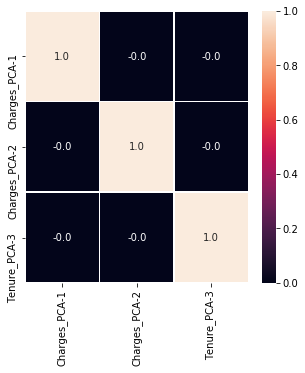

In [145]:
#CORRELATION HEATMAP
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(data[["Charges_PCA-1","Charges_PCA-2","Tenure_PCA-3"]].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [146]:
##########
#MODELLING
##########
#PREPARING CATEGORICAL VARIABLES
data["Churn"] = data["Churn"].replace({"Yes":1,"No":0})
cat_X = data[['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']]
#DUMMY CATEGORICAL VARIABLES
for i in cat_X: 
    cat_X = pd.concat([cat_X,pd.get_dummies(cat_X[str(i)],\
                                            drop_first=True,prefix=str(i))],axis=1)
cat_X = cat_X.drop(columns=['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod'])
features = pd.concat([data[["Charges_PCA-1","Charges_PCA-2","Tenure_PCA-3"]],cat_X],axis=1)
X=features
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
y= data['Churn']

In [147]:
#istatistiksel testlere göre anlamsız olan veriler çıkarıldı
X=X.drop(['gender_Male'],axis=1)
X=X.drop(['PhoneService_Yes'],axis=1)
X=X.drop(['MultipleLines_No phone service'],axis=1)

In [148]:
# Scaling continuous variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [149]:
#SPLITTING THE DATASET INTO THE TRAINING SET AND TEST SET
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [150]:
#LOGISTIC REGRESSION
#FITTING LOGISTIC REGRESSION TO THE TRAINING SET
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression(fit_intercept = True, random_state = 0)
logistic_reg.fit(X_train, y_train)

#PREDICTING THE TEST SET RESULTS
y_pred = logistic_reg.predict(X_test)

In [151]:
#MAKING THE CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
cm_logistic_reg = confusion_matrix(y_test, y_pred)
cm_logistic_reg

array([[1394,  161],
       [ 263,  292]], dtype=int64)

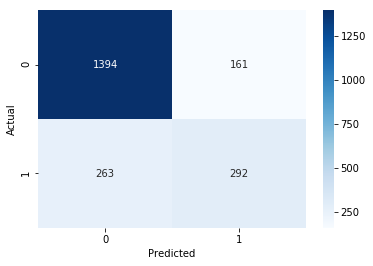

In [152]:
#CONFISUON MATRIX
def cm_logistic_reg(y_pred):
    cm_logistic_reg = confusion_matrix(y_test, y_pred)
    fig = plt.plot(figsize=(8,5))
    sns.heatmap(cm_logistic_reg,annot=True,cmap='Blues',fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    return plt.show()
cm_logistic_reg(y_pred)

In [153]:
print(logistic_reg.score(X_train,y_train))
print(logistic_reg.score(X_test,y_test))

0.8071921982933766
0.7990521327014218


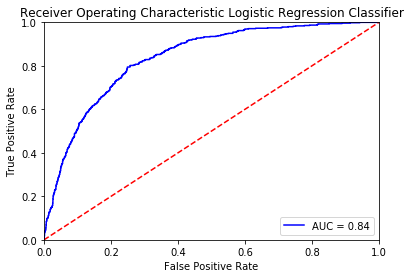

In [154]:
#ROC CURVE
y_proba_logistic = logistic_reg.predict_proba(X_test)

def roc_auc(prediction,model):
    fpr, tpr, thresholds = metrics.roc_curve(y_test,prediction)
    auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic '+str(model))
    plt.plot(fpr, tpr, color='blue', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'--',color='red')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    return plt.show()

roc_auc(y_proba_logistic[:, 1],'Logistic Regression Classifier')

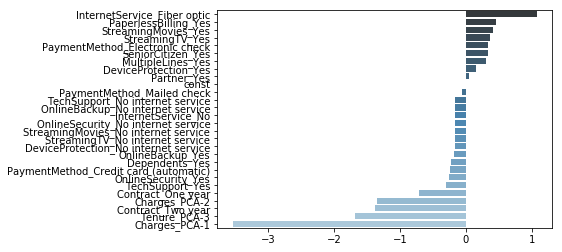

In [155]:
#To get the weights of all the variables
weights = pd.Series(logistic_reg.coef_[0],
                 index=X.columns.values)
weights_sorted=weights.sort_values(ascending = False)

fig = plt.plot(figsize=(80,10))
sns.barplot(y=weights_sorted.index, x=weights_sorted.values, palette="Blues_d", orient='h')

In [156]:
#FITTING RANDOM FOREST TO THE TRAINING SET
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
random_forest.fit(X_train, y_train)

#PREDICTING THE TEST SET RESULTS
y_pred = random_forest.predict(X_test)

In [157]:
#MAKING THE CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
cm_random_forest = confusion_matrix(y_test, y_pred)
cm_random_forest

array([[1391,  164],
       [ 306,  249]], dtype=int64)

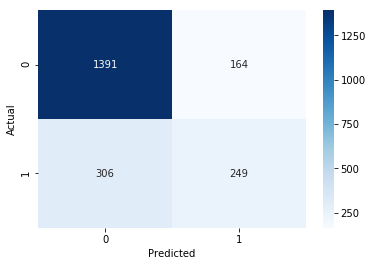

In [158]:
#CONFISUON MATRIX
def cm_random_forest(y_pred):
    cm_random_forest = confusion_matrix(y_test, y_pred)
    plt.plot(figsize=(8,5))
    sns.heatmap(cm_random_forest,annot=True,cmap='Blues',fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    return plt.show()
cm_random_forest(y_pred)

In [159]:
print(random_forest.score(X_train,y_train))
print(random_forest.score(X_test,y_test))

0.9798862251117432
0.7772511848341233


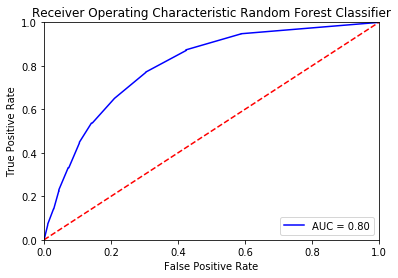

In [160]:
#ROC CURVE
y_proba_random_forest = random_forest.predict_proba(X_test)

def roc_auc(prediction,model):
    fpr, tpr, thresholds = metrics.roc_curve(y_test,prediction)
    auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic '+str(model))
    plt.plot(fpr, tpr, color='blue', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'--',color='red')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    return plt.show()

roc_auc(y_proba_random_forest[:, 1],'Random Forest Classifier')

In [161]:
#DECISION TREE
#FITTING DECISION TREE TO THE TRAINING SET
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
decision_tree.fit(X_train, y_train)

#PREDICTING THE TEST SET RESULTS
y_pred = decision_tree.predict(X_test)

In [163]:
#MAKING THE CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
cm_decision_tree = confusion_matrix(y_test, y_pred)
cm_decision_tree

array([[1251,  304],
       [ 278,  277]], dtype=int64)

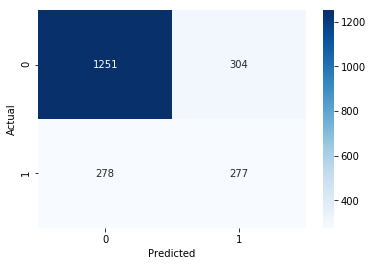

In [164]:
#CONFISUON MATRIX
def cm_decision_tree(y_pred):
    cm_decision_tree = confusion_matrix(y_test, y_pred)
    fig = plt.plot(figsize=(8,5))
    sns.heatmap(cm_decision_tree,annot=True,cmap='Blues',fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    return plt.show()
cm_decision_tree(y_pred)

In [165]:
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_test

0.7241706161137441

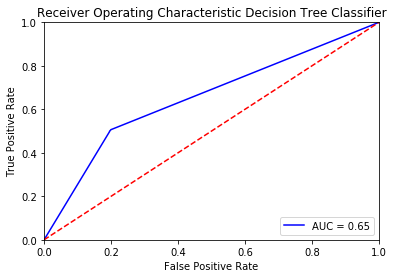

In [166]:
#ROC CURVE
y_proba_decision_tree = decision_tree.predict_proba(X_test)

def roc_auc(prediction,model):
    fpr, tpr, thresholds = metrics.roc_curve(y_test,prediction)
    auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic '+str(model))
    plt.plot(fpr, tpr, color='blue', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'--',color='red')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    return plt.show()

roc_auc(y_proba_decision_tree[:, 1],'Decision Tree Classifier')